In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal

In [2]:
unbalanced = pd.read_csv('./L2.csv')
balanced = pd.read_csv('./Weighted sampling (alpha=0.5).csv')

categories = [
    "water", "trees", "grass", "flooded_vegetation", "crops",
    "shrub_and_scrub", "built", "bare"
]

# Box plot

In [3]:
def boxplot(df, category_intensities):
    # Set up the matplotlib figure
    plt.figure(figsize=(15, 10))

    # Draw a box plot for each category intensity
    for i, category in enumerate(category_intensities, 1):
        plt.subplot(3, 3, i)  # This arranges the plots in a 3x3 grid
        sns.boxplot(y=df[category].dropna(), color='skyblue')  # Drop NA values for plotting
        plt.title(f'{category.capitalize()} Intensity')
        plt.ylabel('Intensity')
        plt.xlabel('')

    plt.tight_layout()
    plt.show()

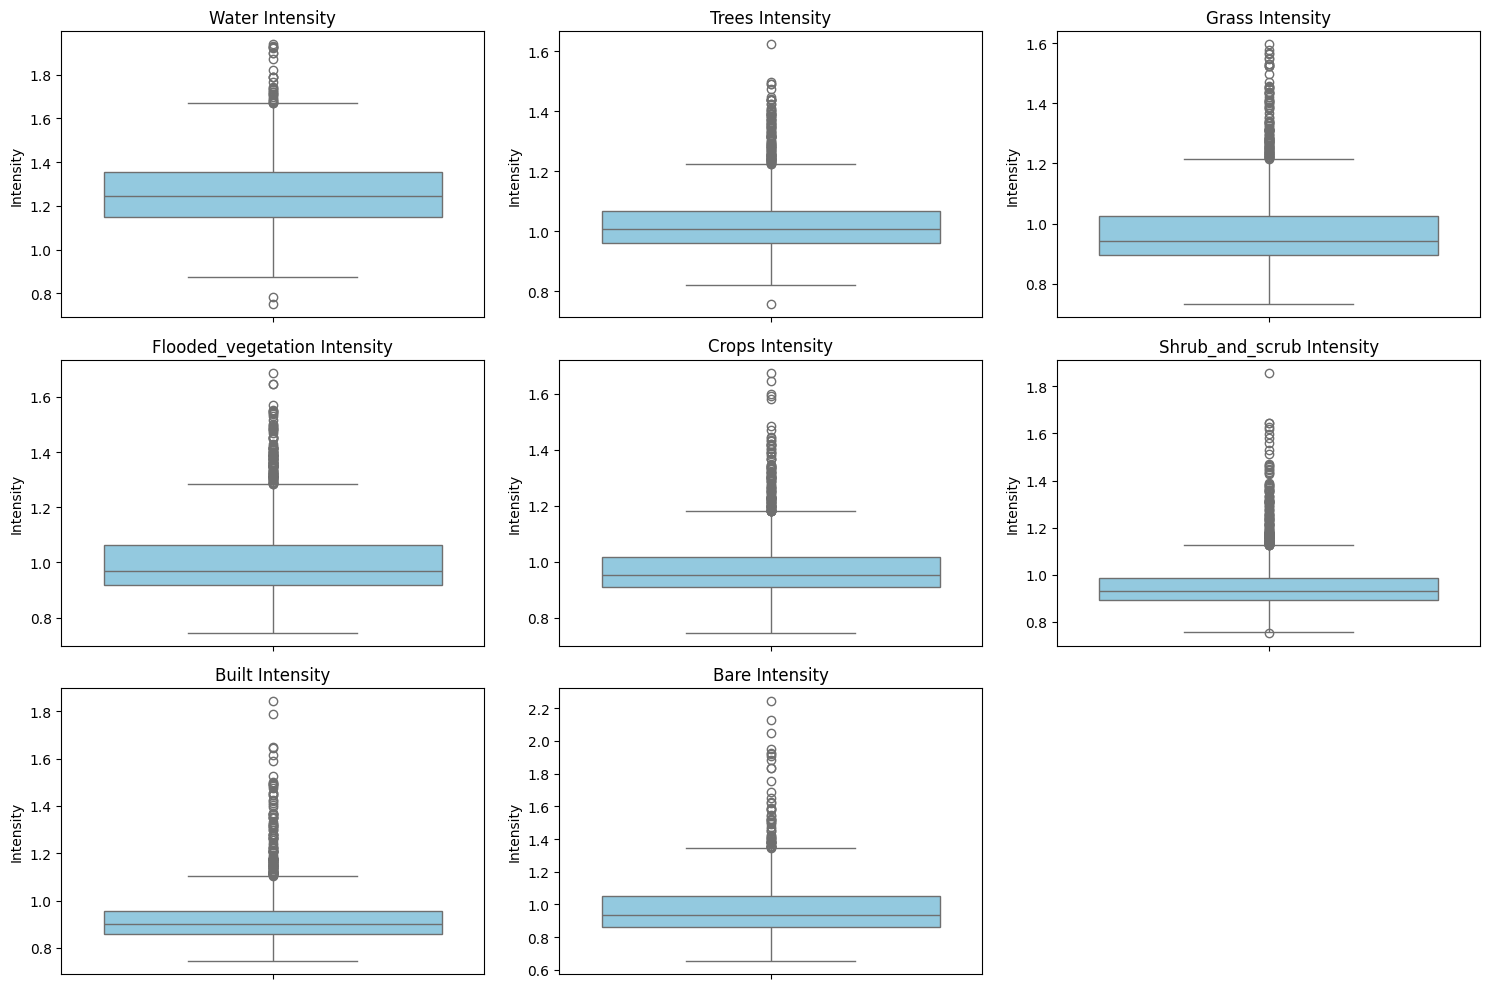

In [4]:
boxplot(unbalanced, categories)

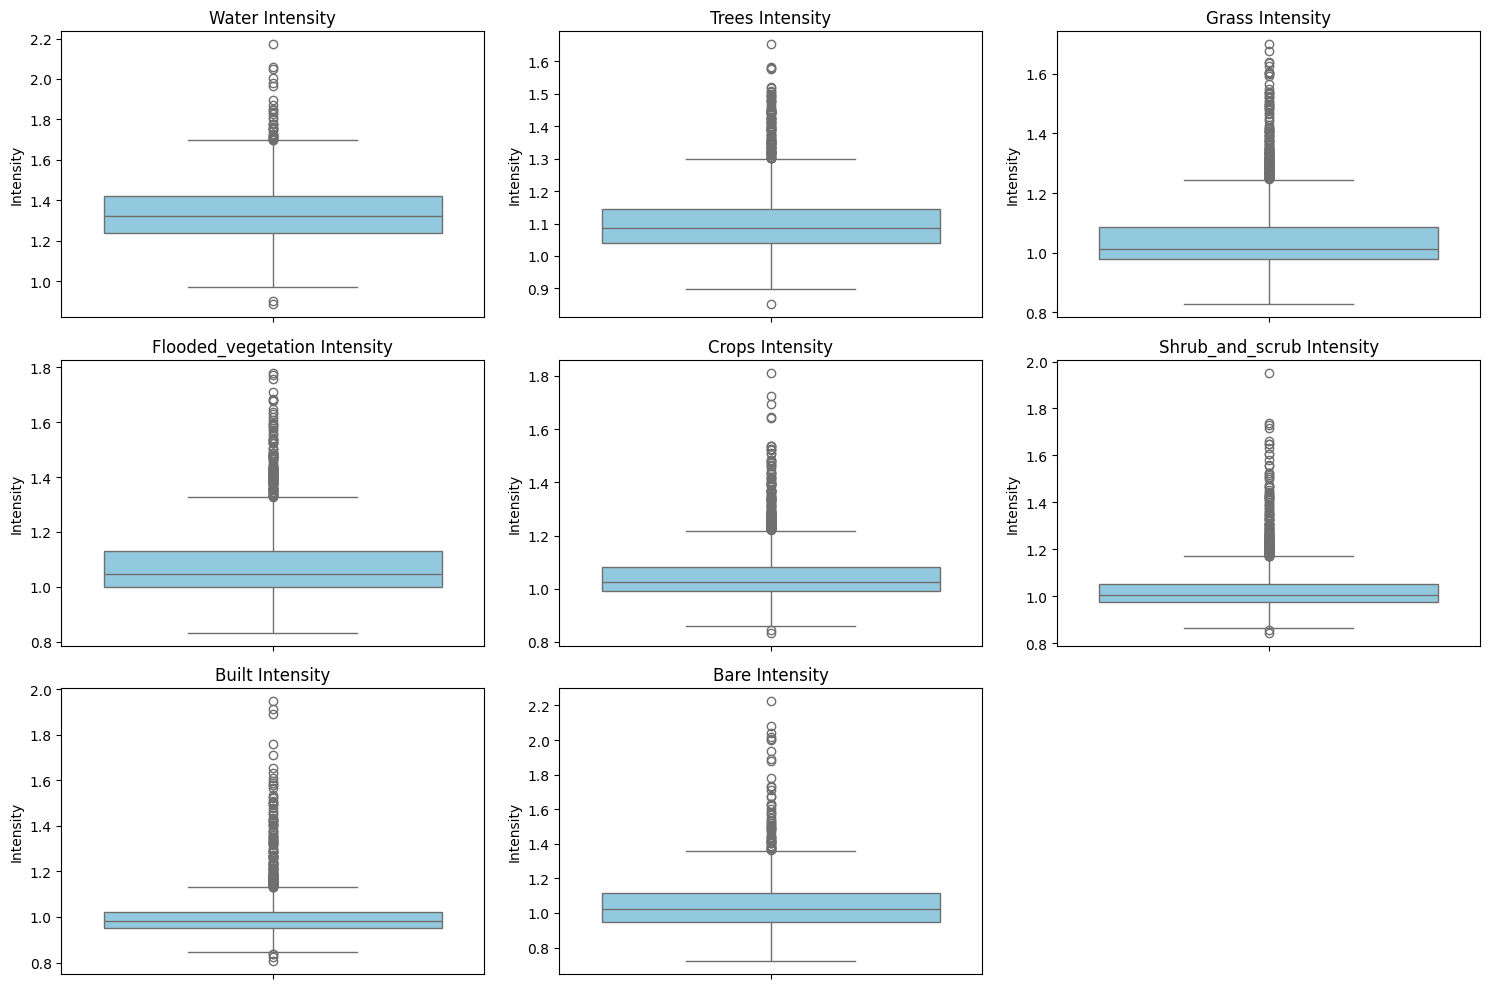

In [5]:
boxplot(balanced, categories)

# Test statistically difference between two models for each category intensity

In [6]:
from scipy.stats import mannwhitneyu

In [7]:
def mannwhitneyu_test(unbalanced, df_2, category):
    intensities_model1 = unbalanced[category]  # Intensities from Model 1
    intensities_model2 = df_2[category]  # Intensities from Model 2

    # Perform Mann-Whitney U Test
    stat, p = mannwhitneyu(intensities_model1.dropna(), intensities_model2.dropna())

    print(f'Statistics={stat}, p={p}')
    if p < 0.05:
        print(f"{category}: Statistically significant difference in intensities")
    else:
        print(f"{category}: No significant difference in intensities")

for category in categories:
    mannwhitneyu_test(unbalanced, balanced, category)

Statistics=1173496.5, p=1.1942813665915007e-52
water: Statistically significant difference in intensities
Statistics=1067868.0, p=1.8810112087899768e-180
trees: Statistically significant difference in intensities
Statistics=1136390.5, p=1.738073094730967e-150
grass: Statistically significant difference in intensities
Statistics=1230697.5, p=1.224879414503222e-118
flooded_vegetation: Statistically significant difference in intensities
Statistics=1045385.5, p=2.4828037557316815e-175
crops: Statistically significant difference in intensities
Statistics=930623.5, p=1.5604309715500426e-220
shrub_and_scrub: Statistically significant difference in intensities
Statistics=839093.0, p=1.6646589254422995e-214
built: Statistically significant difference in intensities
Statistics=608671.0, p=3.6421546325131116e-49
bare: Statistically significant difference in intensities


# Find magnitude of difference in terms of standard deviation from cohen'd test

In [8]:
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx - 1) * np.std(x, ddof=1) ** 2 + (ny - 1) * np.std(y, ddof=1) ** 2) / dof)
    d = (np.mean(x) - np.mean(y)) / pooled_std
    return d

# Assuming unbalanced and df_2 are your dataframes for the two models
for category in categories:
    x = unbalanced[category].dropna()
    y = balanced[category].dropna()
    effect_size = cohen_d(x, y)
    print(f"{category}: Cohen's d = {effect_size:.3f}")

water: Cohen's d = -0.498
trees: Cohen's d = -0.782
grass: Cohen's d = -0.624
flooded_vegetation: Cohen's d = -0.562
crops: Cohen's d = -0.711
shrub_and_scrub: Cohen's d = -0.722
built: Cohen's d = -0.704
bare: Cohen's d = -0.430


# Differences

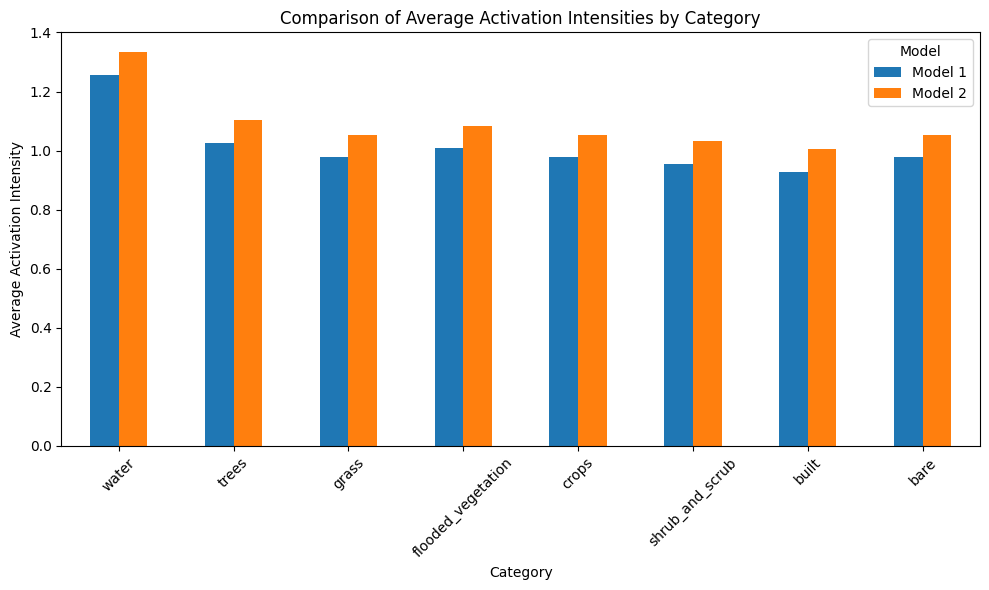

                     Model 1   Model 2 Higher in Model
water               1.256848  1.333820         Model 2
trees               1.026657  1.104258         Model 2
grass               0.977017  1.052434         Model 2
flooded_vegetation  1.008655  1.083517         Model 2
crops               0.977103  1.052639         Model 2
shrub_and_scrub     0.955654  1.032519         Model 2
built               0.927240  1.005339         Model 2
bare                0.976996  1.051792         Model 2


In [9]:
# Example DataFrames: unbalanced and df_2 for the two models
# Calculate mean intensities for each category
mean_intensities_1 = unbalanced[categories].mean()
mean_intensities_2 = balanced[categories].mean()

# Data for plotting
means = pd.DataFrame({
    'Model 1': mean_intensities_1,
    'Model 2': mean_intensities_2
})

# Plotting the comparison
means.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Average Activation Intensities by Category')
plt.xlabel('Category')
plt.ylabel('Average Activation Intensity')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

# Print numerical comparison
comparison = means.copy()
comparison['Higher in Model'] = np.where(comparison['Model 1'] > comparison['Model 2'], 'Model 1', 'Model 2')
print(comparison)

# Further analysis with dividing predictions into ranges 

In [10]:
MIN = 0.28095343708992004
MAX = 3.094515085220337
BINS = 6

bin_edges = np.linspace(MIN, MAX, num= BINS+1)  # 10 bins -> 11 edges
bin_edges[0] = -np.inf
bin_edges[BINS] = np.inf

index_range_labels = [i for i in range(BINS)]
unbalanced['Wealth_Index_Range'] = pd.cut(unbalanced['Prediction'], bins=bin_edges, labels=index_range_labels, include_lowest=True)
balanced['Wealth_Index_Range'] = pd.cut(balanced['Prediction'], bins=bin_edges, labels=index_range_labels, include_lowest=True)

In [11]:
print("Kruskal-Wallis H-test results:")
for category in categories:
    # Gather the intensities for each wealth index range
    intensities_by_range = [unbalanced.loc[unbalanced['Wealth_Index_Range'] == label, category].dropna() 
                            for label in index_range_labels]
    # Perform the Kruskal-Wallis H-test
    stat, p = kruskal(*intensities_by_range)
    print(f"{category}: H-statistic={stat:.2f}, p-value={p:.4f}")

Kruskal-Wallis H-test results:
water: H-statistic=nan, p-value=nan
trees: H-statistic=nan, p-value=nan
grass: H-statistic=nan, p-value=nan
flooded_vegetation: H-statistic=nan, p-value=nan
crops: H-statistic=nan, p-value=nan
shrub_and_scrub: H-statistic=nan, p-value=nan
built: H-statistic=nan, p-value=nan
bare: H-statistic=nan, p-value=nan


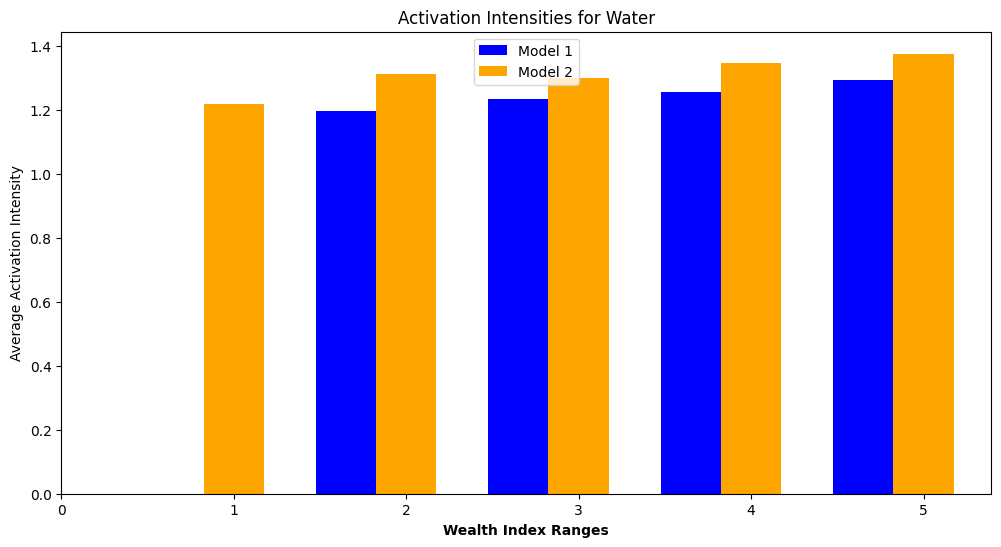

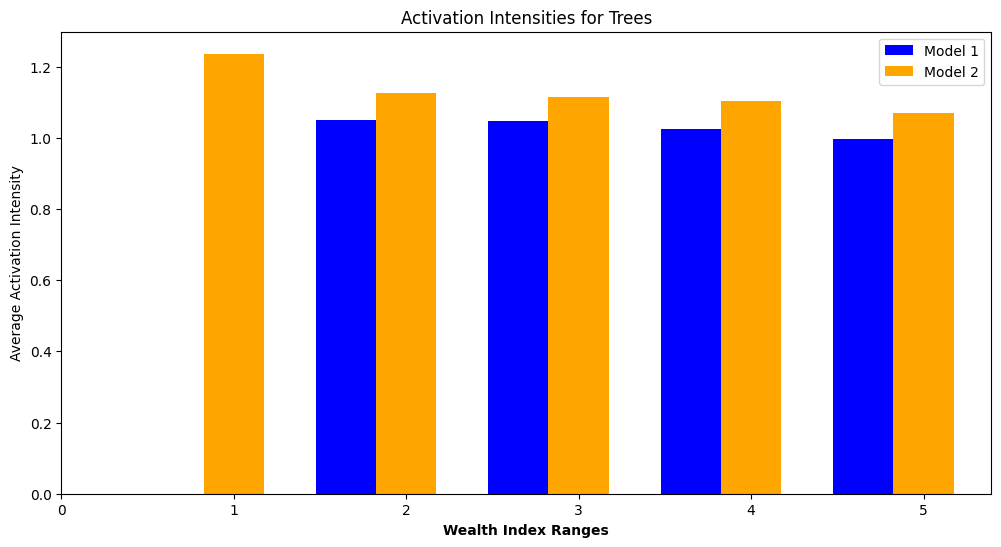

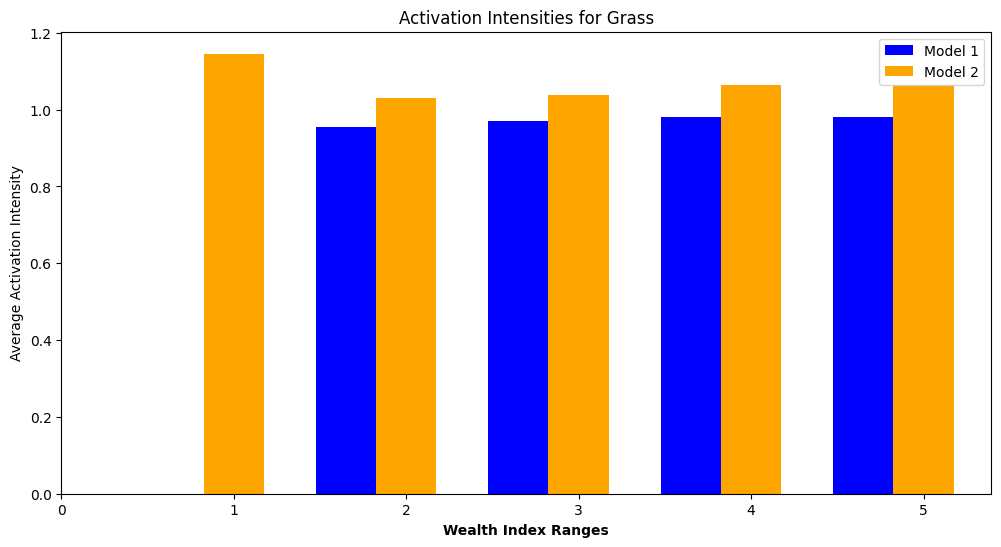

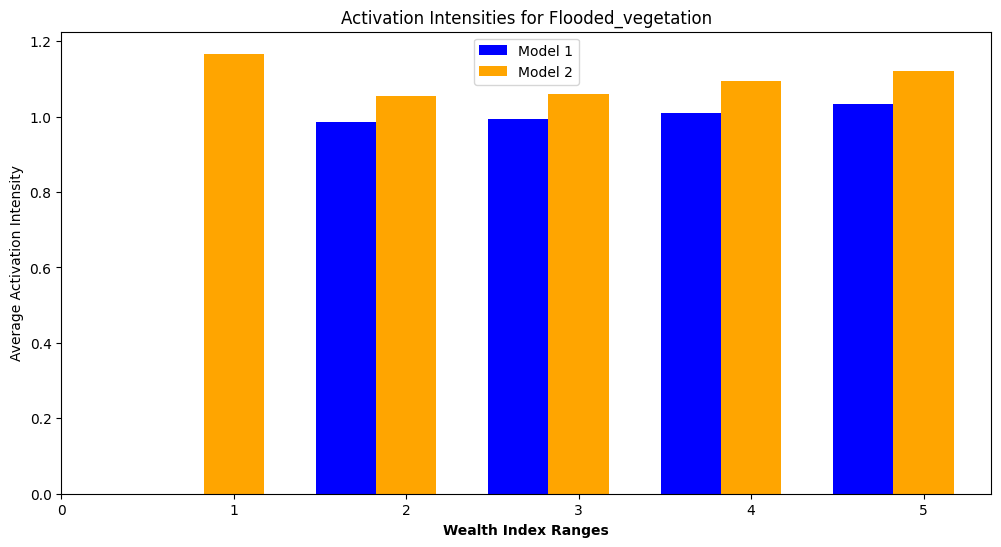

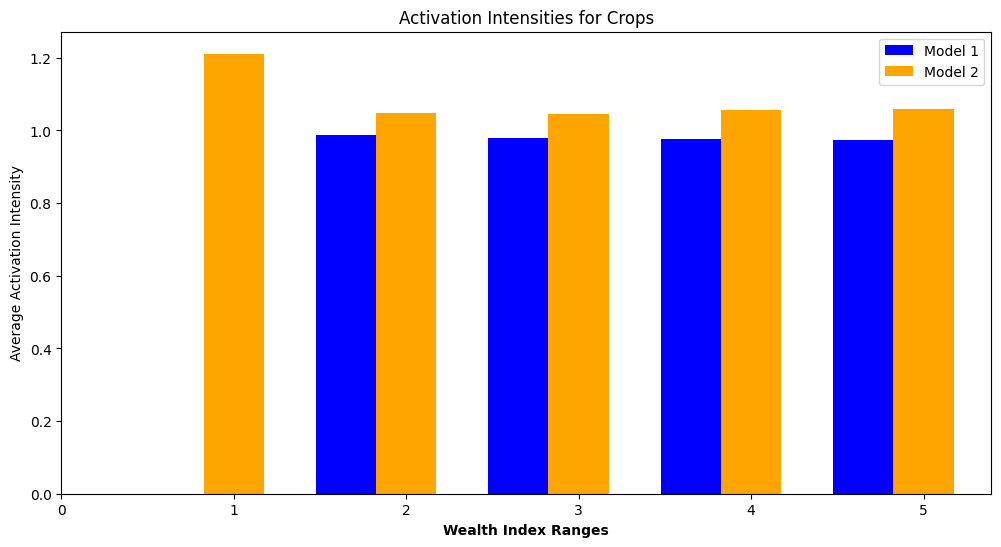

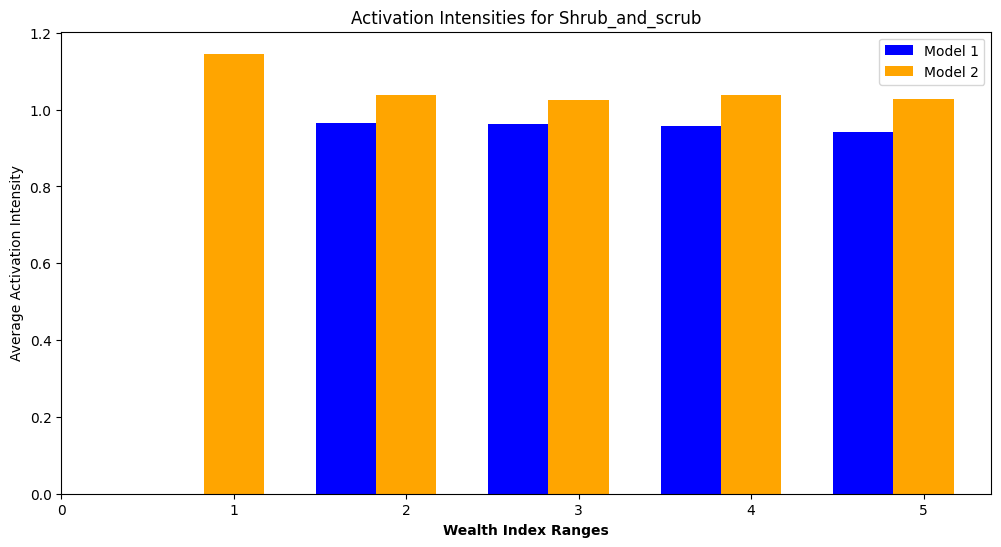

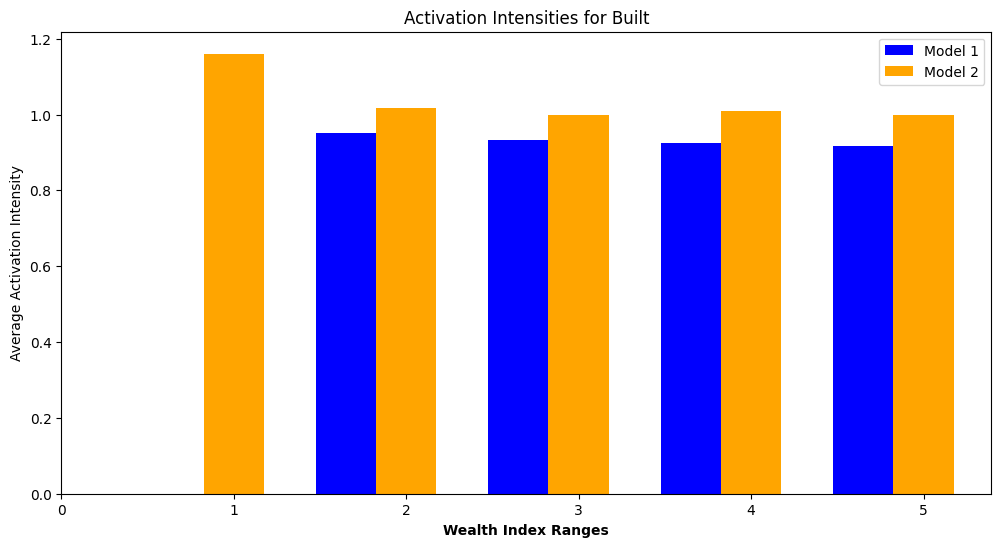

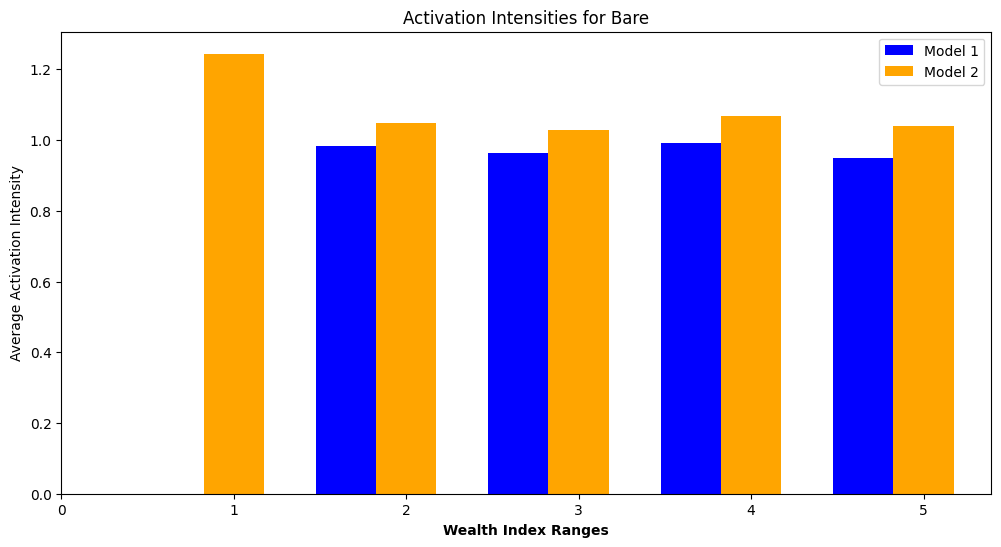

In [13]:
# Assuming unbalanced and balanced have been assigned wealth index ranges already
for category in categories:
    plt.figure(figsize=(12, 6))
    
    # Calculate means for each wealth index range for both models
    category_means_1 = unbalanced.groupby('Wealth_Index_Range', observed=False)[category].mean()
    category_means_2 = balanced.groupby('Wealth_Index_Range', observed=False)[category].mean()

    # Create the bar positions
    bar_width = 0.35  # width of the bars
    r1 = np.arange(len(category_means_1))
    r2 = [x + bar_width for x in r1]
    
    # Create bars
    plt.bar(r1, category_means_1, width=bar_width, color='blue', label='Model 1')
    plt.bar(r2, category_means_2, width=bar_width, color='orange', label='Model 2')
    
    # Add labels, title, and legend
    plt.xlabel('Wealth Index Ranges', fontweight='bold')
    plt.xticks([r + bar_width for r in range(len(category_means_1))], index_range_labels)
    plt.ylabel('Average Activation Intensity')
    plt.title(f'Activation Intensities for {category.capitalize()}')
    plt.legend()
    plt.show()

# Multivariate regression analysis

In [14]:
import xgboost as xgb
import shap

In [15]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')
xg_reg.fit(unbalanced[categories], unbalanced['Prediction'])

# Get feature importances
feature_importances = xg_reg.get_booster().get_score(importance_type='gain')

# Print the feature importances
for feature, importance in feature_importances.items():
    print(f"Feature: {feature}, Gain: {importance}")

Feature: water, Gain: 0.10058707743883133
Feature: trees, Gain: 0.09956178814172745
Feature: grass, Gain: 0.07510560750961304
Feature: flooded_vegetation, Gain: 0.10422256588935852
Feature: crops, Gain: 0.07174474000930786
Feature: shrub_and_scrub, Gain: 0.07623207569122314
Feature: built, Gain: 0.0848560780286789
Feature: bare, Gain: 0.12088988721370697


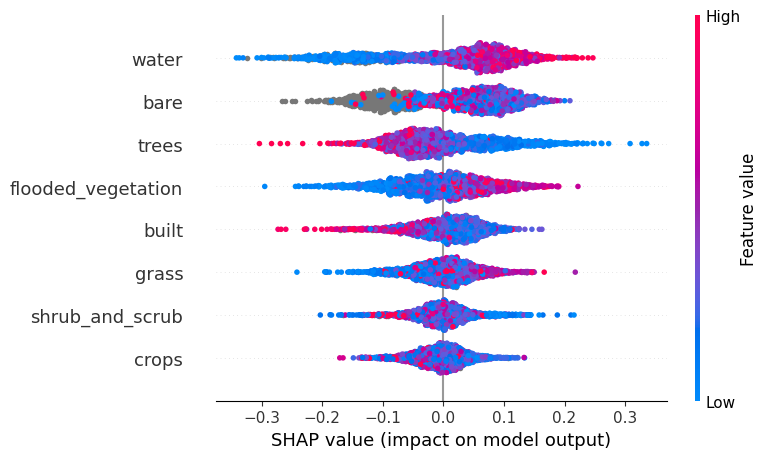

In [16]:
# Calculate SHAP values using the TreeExplainer
explainer = shap.Explainer(xg_reg)
shap_values = explainer.shap_values(unbalanced[categories])

# Summary plot of SHAP values
shap.summary_plot(shap_values, unbalanced[categories], title='Model 1')

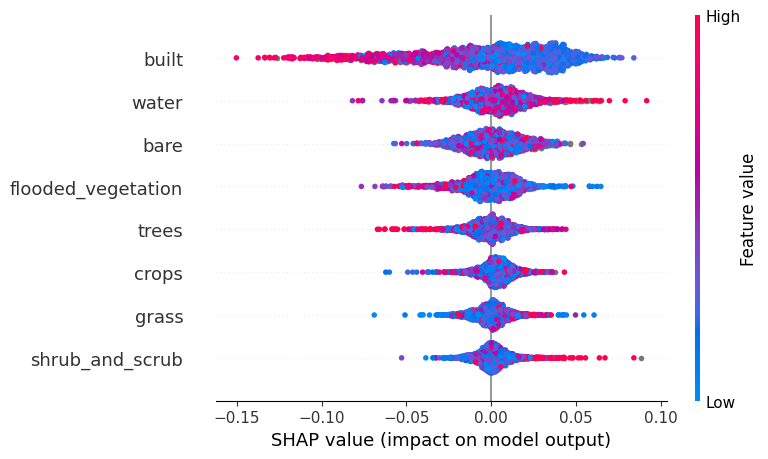

In [17]:
# Calculate SHAP interaction values for the entire dataset (this can be computationally intensive)
shap_interaction_values = explainer.shap_interaction_values(unbalanced[categories])

# Assuming 'built' is a feature in your dataset and you have a list of feature names in 'categories'
built_index = categories.index('built')

# Generate the summary plot for the 'built' feature interactions
shap.summary_plot(shap_interaction_values[:, :, built_index], unbalanced[categories], feature_names=categories)

In [18]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')
xg_reg.fit(balanced[categories], balanced['Prediction'])

# Get feature importances
feature_importances = xg_reg.get_booster().get_score(importance_type='gain')

# Print the feature importances
for feature, importance in feature_importances.items():
    print(f"Feature: {feature}, Gain: {importance}")

Feature: water, Gain: 0.09600625932216644
Feature: trees, Gain: 0.11109168827533722
Feature: grass, Gain: 0.09078855812549591
Feature: flooded_vegetation, Gain: 0.14016172289848328
Feature: crops, Gain: 0.07151149213314056
Feature: shrub_and_scrub, Gain: 0.09987732768058777
Feature: built, Gain: 0.09349773079156876
Feature: bare, Gain: 0.18822462856769562


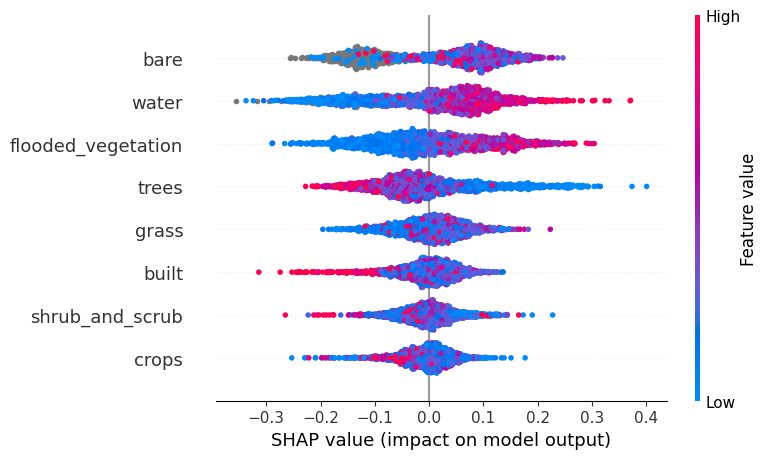

In [19]:
# Calculate SHAP values using the TreeExplainer
explainer = shap.Explainer(xg_reg)
shap_values = explainer.shap_values(balanced[categories])

# Summary plot of SHAP values
shap.summary_plot(shap_values, balanced[categories])

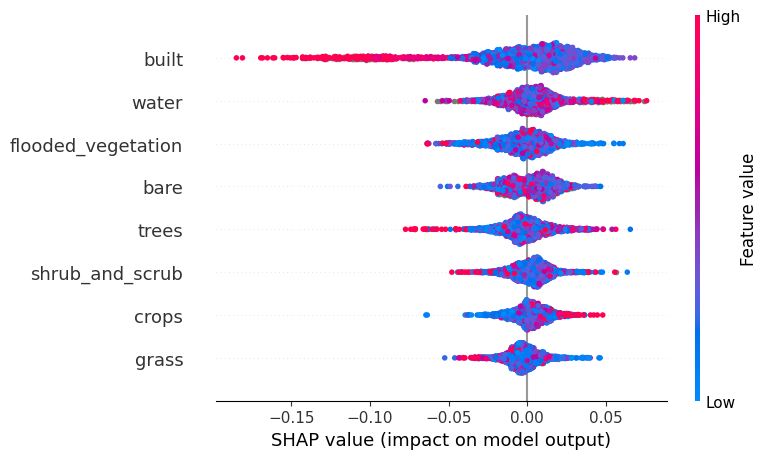

In [20]:
# Calculate SHAP interaction values
shap_interaction_values = explainer.shap_interaction_values(balanced[categories])

# Summary plot of SHAP interaction values for the 'built' feature
shap.summary_plot(shap_interaction_values[:, :, categories.index('built')], balanced[categories])